<a href="https://colab.research.google.com/github/Malekkamoua/Medical-data-classifier/blob/main/Labelling_data_with_8_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Il faut copier les fichiers dans les chemins d'accès convenable

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/gdrive/MyDrive/PFA DATA/labelled_data_80.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/PFA DATA/Copy of unlabelled_data_80.csv')

arr1 = np.array(df1['SUMMARY'].values)
arr2 = np.array(df2['SUMMARY'].values)

doc = np.concatenate((arr1, arr2))

print(len(doc))

15593


In [ ]:
from gensim import corpora

# be sure to split sentence before feed into Dictionary
dataset = [d.split() for d in doc]

dictionary = corpora.Dictionary(dataset)
corpus = [dictionary.doc2bow(text) for text in dataset]

In [ ]:
from gensim.models import TfidfModel, LsiModel
from gensim.models.ldamodel import LdaModel
from gensim import matutils
from sklearn.cluster import KMeans
            
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# fit LDA model
transcripts_topics = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           random_state=1,
                           num_topics=8,
                           alpha='auto', ##Learns an asymmetric prior from the corpus;
##1D array of length=number of expected topics that expresses our a-priori belief for the each topics’ probability.
                           passes=100 ##Number of passes through the corpus during training.
                             ) 


In [ ]:
print(transcripts_topics)
# print out first 8 topics
for i, topic in enumerate(transcripts_topics.print_topics(8)):
    print ('%d: %s\n'%(i+1, topic))

LdaModel(num_terms=16490, num_topics=8, decay=0.5, chunksize=2000)
1: (0, '0.039*"test" + 0.034*"hearing" + 0.022*"open" + 0.021*"back" + 0.019*"help" + 0.018*"level" + 0.017*"loss" + 0.015*"blood" + 0.015*"banner" + 0.012*"work"')

2: (1, '0.082*"treatment" + 0.057*"addiction" + 0.036*"drug" + 0.035*"alcohol" + 0.028*"abuse" + 0.024*"health" + 0.019*"mental" + 0.019*"substance" + 0.017*"medicine" + 0.016*"intake"')

3: (2, '0.027*"diabetes" + 0.023*"pet" + 0.019*"care" + 0.017*"diabetic" + 0.016*"item" + 0.014*"health" + 0.014*"blood" + 0.012*"therapy" + 0.011*"pressure" + 0.011*"."')

4: (3, '0.018*"." + 0.016*"search" + 0.011*"home" + 0.010*"drug" + 0.010*"skip" + 0.009*"receive" + 0.009*"allergy" + 0.009*"share" + 0.008*"next" + 0.007*"content"')

5: (4, '0.125*"+" + 0.041*"health" + 0.029*"dental" + 0.027*"news" + 0.023*"member" + 0.021*"practice" + 0.020*"family" + 0.017*"center" + 0.017*"care" + 0.013*"advocacy"')

6: (5, '0.035*"news" + 0.026*"contact" + 0.023*"weather" + 0.020

In [ ]:
pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(transcripts_topics, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.060678  0.032941       1        1  18.322343
5     -0.036001  0.014136       2        1  17.314981
7     -0.007970 -0.164068       3        1  17.051220
4     -0.039789 -0.222651       4        1  12.670747
1     -0.308337  0.221176       5        1  12.568793
6     -0.057441 -0.129120       6        1   9.334292
0      0.153766  0.111680       7        1   7.136293
2      0.235094  0.135906       8        1   5.601333, topic_info=          Term          Freq         Total Category  logprob  loglift
308          +  21174.000000  21174.000000  Default  30.0000  30.0000
90   treatment  13770.000000  13770.000000  Default  29.0000  29.0000
101  addiction  10393.000000  10393.000000  Default  28.0000  28.0000
126       drug   8319.000000   8319.000000  Default  27.0000  27.0000
102    alcohol   5828.000000   5828.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
602    account    573.791337   3190.349717   Topic8  -4.8533   1.1665
0            .    827.611100  12468.528224   Topic8  -4.4870   0.1697
140       food    503.399092   2595.923487   Topic8  -4.9842   1.2419
380  nutrition    452.482237   1581.138267   Topic8  -5.0908   1.6310
74     medical    470.012092   7119.957876   Topic8  -5.0528   0.1643

[557 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
308       3  0.018371      +
308       4  0.981567      +
0         1  0.345911      .
0         2  0.224245      .
0         3  0.050367      .
...     ...       ...    ...
1435      1  0.100394  young
1435      2  0.052955  young
1435      3  0.846174  young
205       5  0.998824  youth
2884      2  0.996958    zoo

[1096 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 5, 2, 7, 1, 3])

In [ ]:
#Get topics
topics = transcripts_topics.show_topics(num_topics=8, num_words=10, log=False , formatted=False)
topics

In [ ]:
import gensim
import pandas as pd 

all_topics = transcripts_topics.get_document_topics(corpus, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_df = pd.DataFrame(all_topics_numpy)

all_topics_df

,0,1,2,3,4,5,6,7
0,0.003071,0.002983,0.002898,0.799269,0.003466,0.006108,0.003127,0.179079
1,0.134087,0.001428,0.001387,0.005233,0.001659,0.051270,0.001497,0.803438
2,0.001441,0.803539,0.001360,0.140366,0.001626,0.002864,0.001467,0.047337
3,0.000308,0.959118,0.037788,0.001035,0.000348,0.000613,0.000314,0.000475
4,0.033511,0.000648,0.000630,0.046308,0.000753,0.916442,0.000679,0.001028
...,...,...,...,...,...,...,...,...
15588,0.037209,0.001065,0.051083,0.174384,0.001237,0.180404,0.001116,0.553501
15589,0.001988,0.001931,0.001876,0.115020,0.002244,0.871850,0.002024,0.003066
15590,0.000692,0.033314,0.050609,0.062400,0.000781,0.063700,0.787436,0.001068
15591,0.107280,0.057622,0.001309,0.132138,0.412917,0.002766,0.023120,0.262847


In [ ]:
import csv
id = 0
with open('labelled_data.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['ROW_ID']  + ['TEXT'] + ['SUMMARY'])
    for file in doc:
      if file != "":
        spamwriter.writerow([id, file, file])
        id = id +1

In [ ]:
import pandas as pd
url = '/content/labelled_data.csv'
notes_data = pd.read_csv(url)

display(notes_data.head(10))


In [ ]:
# extract all document-topic distritbutions to dictionnary
document_key = list(notes_data.index) ##get index of transcripts for topic in each
document_topic = {}
for doc_id in range(len(corpus)):
    docbok = corpus[doc_id]
    #get_document_topics: Returns topic distribution for the given document bow, as a list of (topic_id, topic_probability) 
    doc_topics = transcripts_topics.get_document_topics(docbok, 0)
    tmp = []
    for topic_id, topic_prob in doc_topics:
        tmp.append(topic_prob)
    if doc_id < len(notes_data):
      document_topic[document_key[doc_id]] = tmp
# convert dictionnary of document-topic distritbutions to dataframe
df = pd.DataFrame.from_dict(document_topic, orient='index')
topic_column_names = ['topic_' + str(i) for i in range(0, 8)]
df.columns = topic_column_names
df['SUMMARY'] = (notes_data['SUMMARY'])

def find_topic(row):
    if (row.loc[row>0.8]).any():
        return row.loc[row>0.8].index[0]
    else:
        return None
    
def find_propensity(row):
    if (row.loc[row>0.8]).any():
        return row.loc[row>0.8].values[0]
    else:
        return None
    
df['topic'] = df.loc[:, df.columns !='SUMMARY'].apply(find_topic, axis = 1)
df['propensity'] = df.iloc[:, 0:8].apply(find_propensity, axis = 1)
df.drop(columns=df.columns[:8], inplace=True)

#filtering non null
filtered_df = df[df['topic'].notnull()]
display(filtered_df.head(1000))
filtered_df.to_csv('labelled_data.csv', index=False) 

df1 = df[df.isna().any(axis=1)]
display(df1.head(1000))
df1.to_csv('non_labelled_data.csv', index=False) 



,SUMMARY,topic,propensity
1,pol sabine pintura mile con primer las regin e...,topic_7,0.803434
2,welcome medicine hospital medicine free trial ...,topic_1,0.803537
3,home reference addiction club cocaine addictio...,topic_1,0.959119
4,menu watch live watch weather close watch live...,topic_5,0.916445
5,skip main content toggle menu web .access news...,topic_4,0.976439
...,...,...,...
1208,welcome medicine free trial hospital medicine ...,topic_1,0.975461
1209,skip main page content skip search skip menu s...,topic_3,0.881422
1210,member advantage take advantage endorsed busin...,topic_4,0.986651
1211,call login popular hepatitis titer blood test ...,topic_0,0.953020


,SUMMARY,topic,propensity
0,skip main content create version content curre...,None,NaN
13,previous article next article issue version pr...,None,NaN
15,perry fully practice substance abuse anxiety ....,None,NaN
30,although primary delivery may minimal risk fir...,None,NaN
33,overview month week calendar list march may ju...,None,NaN
...,...,...,...
5999,account search returned rand next free good be...,None,NaN
6001,perry fully practice substance abuse anxiety ....,None,NaN
6002,perry fully practice substance abuse anxiety ....,None,NaN
6003,perry fully practice substance abuse anxiety ....,None,NaN


In [ ]:
import csv
with open('/content/labelled_data.csv') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        pass
    print(csv_reader.line_num)

with open('/content/non_labelled_data.csv') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        pass
    print(csv_reader.line_num)

7391
8204


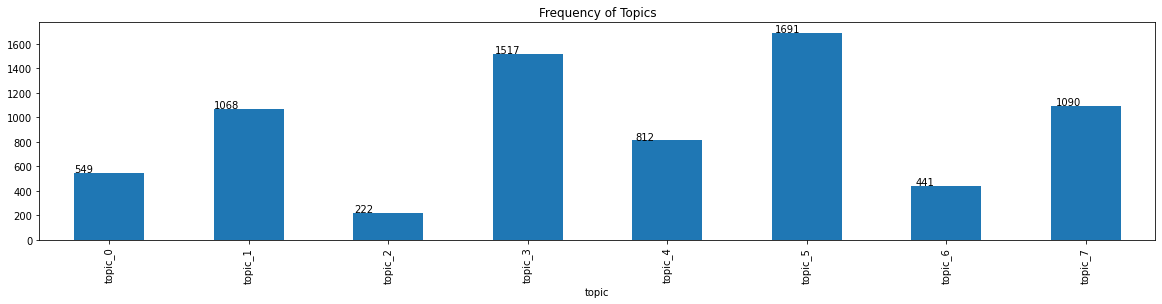

In [ ]:
from matplotlib import pyplot as plt

# fig = plt.figure(figsize=(10,4))
plt.rcParams["figure.figsize"] = (20,4)

topic_frequency = df.iloc[:, :2].groupby('topic').count()
ax = topic_frequency.plot.bar( legend=False)
plt.title("Frequency of Topics", size=12)
# plt.xticks(rotation=45)
ax.tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=30)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()